In [1]:
import pandas as pd

In [2]:
pd.__version__

'2.0.0'

In [31]:
import psutil

# Get the system's available memory in bytes
available_memory = psutil.virtual_memory().available

print(f"Available memory: {available_memory}")

Available memory: 15660417024


In [8]:
available_memory / 1024 / 1024 / 1024

16.036285400390625

In [32]:
available_memory / 1024 / 1024 / 1024

14.58489990234375

In [9]:
!ls

Analisis subvenciones.ipynb  docs/
CODE_OF_CONDUCT.md           explorador/
LICENSE                      files/
README.md                    files.bak/
README_en.md                 requirements.txt
db/


In [11]:
!head -n 500000 files/juridicas-final.csv > files/juridicas-muestra.csv

In [13]:
!ls -lh files/*muestra.csv

-rw-r--r--@ 1 juan_cano  staff   228M Apr 24 19:24 files/juridicas-muestra.csv


In [19]:
df = pd.read_csv(
    "files/juridicas-final.csv",
    dtype={"codigo_bdns": "str"},
)
df.head(1)

,id,id_convocatoria,administracion,departamento,organo,titulo_convocatoria,url_bases_regul,apli_presupuestaria,fecha_concesion,beneficiario,importe,instrumento,ayuda_equivalente,detalles,codigo_bdns,valor_desconocido,id_interna
0,65045185,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,24/03/2022,P4407400C AYUNTAMIENTO DE CEDRILLAS,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,1


In [20]:
len(df)

3810368

In [28]:
len(df.columns)

17

In [29]:
df.dtypes

id                       int64
id_convocatoria          int64
administracion          object
departamento            object
organo                  object
titulo_convocatoria     object
url_bases_regul         object
apli_presupuestaria     object
fecha_concesion         object
beneficiario            object
importe                float64
instrumento             object
ayuda_equivalente      float64
detalles                 int64
codigo_bdns             object
valor_desconocido        int64
id_interna               int64
dtype: object

In [31]:
df["fecha_concesion"] = pd.to_datetime(
    df["fecha_concesion"], dayfirst=True
)

In [36]:
df.dtypes

id                              int64
id_convocatoria                 int64
administracion                 object
departamento                   object
organo                         object
titulo_convocatoria            object
url_bases_regul                object
apli_presupuestaria            object
fecha_concesion        datetime64[ns]
beneficiario                   object
importe                       float64
instrumento                    object
ayuda_equivalente             float64
detalles                        int64
codigo_bdns                    object
valor_desconocido               int64
id_interna                      int64
dtype: object

In [37]:
df.head()

,id,id_convocatoria,administracion,departamento,organo,titulo_convocatoria,url_bases_regul,apli_presupuestaria,fecha_concesion,beneficiario,importe,instrumento,ayuda_equivalente,detalles,codigo_bdns,valor_desconocido,id_interna
0,65045185,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4407400C AYUNTAMIENTO DE CEDRILLAS,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,1
1,65045222,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4427500F AYUNTAMIENTO DE VILLARQUEMADO,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,2
2,65045266,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4422100J AYUNTAMIENTO DE SANTA EULALIA DEL CAMPO,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,3
3,65045280,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4407600H AYUNTAMIENTO DE CELLA,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,4
4,65042893,818661,DIPUTACIÓN PROV. DE BADAJOZ,DIPUTACIÓN PROVINCIAL DE BADAJOZ,NaN,CONVOCATORIA_SUBV_NOM_2022_EXTREMADURA FEMENIN...,http://economia.dip-badajoz.es/presupuestos,2022-111/34100/48041,2022-03-24,G06330500 CLUB DEPORTIVO EXTREMADURA FEMENINO CF,10000.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,10000.0,0,617101,10413793,5


In [38]:
df["id"].is_unique

True

In [39]:
df["id_interna"].is_unique

True

In [32]:
df = df.set_index("id")

In [41]:
df.head(1)

,id_convocatoria,administracion,departamento,organo,titulo_convocatoria,url_bases_regul,apli_presupuestaria,fecha_concesion,beneficiario,importe,instrumento,ayuda_equivalente,detalles,codigo_bdns,valor_desconocido,id_interna
id,,,,,,,,,,,,,,,,
65045185,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4407400C AYUNTAMIENTO DE CEDRILLAS,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,1


In [42]:
df.describe()

,id_convocatoria,fecha_concesion,importe,ayuda_equivalente,detalles,valor_desconocido,id_interna
count,499717.000000,499717,4.997170e+05,4.997170e+05,499717.000000,499717.0,4.997170e+05
mean,741190.861103,2021-04-30 20:06:33.717243904,5.346162e+04,1.484514e+04,0.003698,10413793.0,5.322935e+06
min,1068.000000,2021-01-26 00:00:00,1.000000e-02,0.000000e+00,0.000000,10413793.0,1.000000e+00
25%,741707.000000,2021-03-12 00:00:00,2.000000e+03,0.000000e+00,0.000000,10413793.0,5.097310e+06
50%,754767.000000,2021-03-31 00:00:00,1.200000e+04,5.896900e+02,0.000000,10413793.0,5.418442e+06
75%,754767.000000,2021-04-27 00:00:00,4.213728e+04,3.735520e+03,0.000000,10413793.0,6.409678e+06
max,818797.000000,2022-03-24 00:00:00,2.586509e+08,2.586509e+08,1.000000,10413793.0,7.926566e+06
std,36899.683907,NaN,7.668875e+05,6.404002e+05,0.060699,0.0,2.003948e+06


In [47]:
%pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.7/28.7 MB 4.8 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


(0.0, 1000000.0)

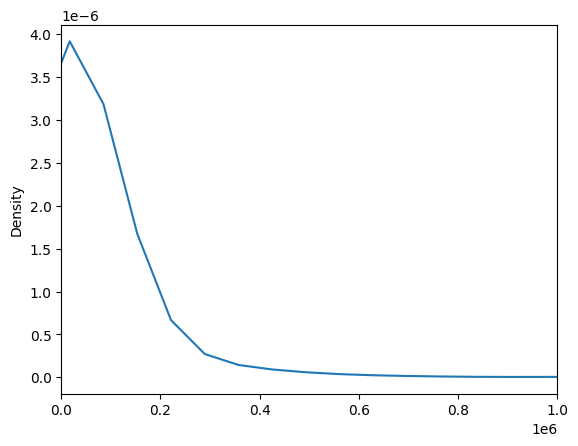

In [9]:
ax = df.sample(frac=0.01)["importe"].plot.kde()
ax.set_xlim(0, 1e6)

In [11]:
df.nunique()

id_convocatoria          9091
administracion            720
departamento             1196
organo                     67
titulo_convocatoria      8864
url_bases_regul          3128
apli_presupuestaria      8668
fecha_concesion           127
beneficiario           329877
importe                119052
instrumento                 4
ayuda_equivalente      115813
detalles                    2
codigo_bdns              9091
valor_desconocido           1
id_interna             499717
dtype: int64

In [12]:
df["administracion"].value_counts()

administracion
ESTADO                      287139
CATALUÑA                     45800
CASTILLA Y LEÓN              25541
CASTILLA-LA MANCHA           22769
COMUNITAT VALENCIANA         14720
                             ...  
POBLA TORNESA, LA                1
VILLANUEVA DE LAS CRUCES         1
BERMEO                           1
AZKOITIA                         1
CORULLÓN                         1
Name: count, Length: 720, dtype: int64

In [13]:
df["instrumento"].value_counts()

instrumento
SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPRESTACIÓN     270408
GARANTÍA                                                228465
PRÉSTAMOS                                                  837
OTROS INSTRUMENTOS DE AYUDA                                  7
Name: count, dtype: int64

In [14]:
df["url_bases_regul"].describe()

count                                             499717
unique                                              3128
top       https://www.boe.es/eli/es/rdl/2020/03/17/8/con
freq                                              189964
Name: url_bases_regul, dtype: object

In [15]:
df["organo"].describe()

count                           287139
unique                              67
top       INSTITUTO DE CRÉDITO OFICIAL
freq                            223679
Name: organo, dtype: object

In [16]:
df["organo"].value_counts()

organo
INSTITUTO DE CRÉDITO OFICIAL                                                   223679
ENTIDAD PÚBLICA EMPRESARIAL RED.ES                                              31522
ENTIDAD ESTATAL DE SEGUROS AGRARIOS - ENESA                                     20687
COMPAÑÍA ESPAÑOLA DE REAFIANZAMIENTO, S.M.E., S.A.                               4470
OFICINA ESPAÑOLA DE PATENTES Y MARCAS, O.A.                                       965
                                                                                ...  
DIRECCION PROVINCIAL DEL SEPE DE CORDOBA                                            1
SECRETARÍA GENERAL DE OBJETIVOS Y POLÍTICAS DE INCLUSIÓN Y PREVISIÓN SOCIAL         1
CONSEJO SUPERIOR DE DEPORTES                                                        1
INSTITUTO DE CONTABILIDAD Y AUDITORÍA DE CUENTAS                                    1
DIRECCIÓN GENERAL DE EVALUACIÓN Y COOPERACIÓN TERRITORIAL                           1
Name: count, Length: 67, dtype: int64

In [10]:
df.head()

,id_convocatoria,administracion,departamento,organo,titulo_convocatoria,url_bases_regul,apli_presupuestaria,fecha_concesion,beneficiario,importe,instrumento,ayuda_equivalente,detalles,codigo_bdns,valor_desconocido,id_interna
id,,,,,,,,,,,,,,,,
65045185,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4407400C AYUNTAMIENTO DE CEDRILLAS,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,1
65045222,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4427500F AYUNTAMIENTO DE VILLARQUEMADO,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,2
65045266,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4422100J AYUNTAMIENTO DE SANTA EULALIA DEL CAMPO,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,3
65045280,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4407600H AYUNTAMIENTO DE CELLA,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,4
65042893,818661,DIPUTACIÓN PROV. DE BADAJOZ,DIPUTACIÓN PROVINCIAL DE BADAJOZ,NaN,CONVOCATORIA_SUBV_NOM_2022_EXTREMADURA FEMENIN...,http://economia.dip-badajoz.es/presupuestos,2022-111/34100/48041,2022-03-24,G06330500 CLUB DEPORTIVO EXTREMADURA FEMENINO CF,10000.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,10000.0,0,617101,10413793,5


In [21]:
df["beneficiario"].value_counts()

beneficiario
Q2818002D AGENCIA ESTATAL CONSEJO SUPERIOR DE INVESTIGACIONES CIENTIFICAS (CSIC)    4796
Q2866001G CRUZ ROJA ESPAÑOLA                                                        3469
Q1818002F UNIVERSIDAD DE GRANADA                                                    1646
Q4118001I UNIVERSIDAD DE SEVILLA                                                    1428
Q0818001J UNIVERSIDAD DE BARCELONA                                                  1105
                                                                                    ... 
B76256569 BOSPAEZ S.L.                                                                 1
B65569816 AGPER ECONOMISTES I ADVOCATS SLP                                             1
B53525762 PROYECTOS RUIZ MARTINEZ S.L.                                                 1
E36053940 ALUMINIOS CHEDA CB                                                           1
V13015334 S.A.T.N-885- BERNAV                                                          1
Name: co

In [29]:
(
    df
    .groupby("beneficiario")["importe"].sum()
    .sort_values(ascending=False)
    .head(20)
    .to_frame()
)

,importe
beneficiario,
Q4618001D UNIVERSITAT DE VALENCIA (ESTUDI GENERAL DE VALENCIA),1.481605e+09
Q4618002B UNIVERSIDAD POLITECNICA DE VALENCIA-MINISTERIO DE UNIVERSIDADES E INVESTIGACION,1.234546e+09
S2827001E Mº SANIDAD CONSUMO Y BIENESTAR SOCIAL,8.667116e+08
Q2866001G CRUZ ROJA ESPAÑOLA,7.908705e+08
"A28017895 EL CORTE INGLES, S.A.",7.180400e+08
Q3018001B UNIVERSIDAD DE MURCIA,7.100083e+08
A63422141 VUELING AIRLINES S.A.,6.536450e+08
A38666897 BINTER CANARIAS S.A.,6.377104e+08
A85850394 IBERIA LINEAS AEREAS DE ESPAÑA SA OPERADORA,6.156000e+08


In [33]:
df["fecha_concesion"].describe()

count                          3810368
mean     2020-06-17 08:07:47.180073728
min                2018-01-01 00:00:00
25%                2019-09-23 00:00:00
50%                2020-09-03 00:00:00
75%                2021-04-28 00:00:00
max                2022-03-24 00:00:00
Name: fecha_concesion, dtype: object

In [39]:
df["fecha_concesion"].dt.year.head(1)

id
65045185    2022
Name: fecha_concesion, dtype: int32

In [37]:
df["fecha_concesion"].dt.day_name(locale="es_ES").head(1)

id
65045185    Jueves
Name: fecha_concesion, dtype: object

In [40]:
df.groupby(df["fecha_concesion"].dt.year)["importe"].sum()

fecha_concesion
2018    1.858500e+10
2019    1.966609e+10
2020    8.030500e+10
2021    5.976936e+10
2022    3.278892e+09
Name: importe, dtype: float64

<Axes: xlabel='fecha_concesion'>

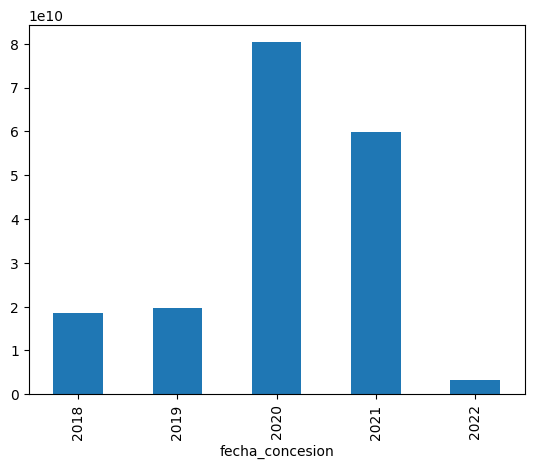

In [41]:
_40.plot.bar()

<Axes: xlabel='fecha_concesion'>

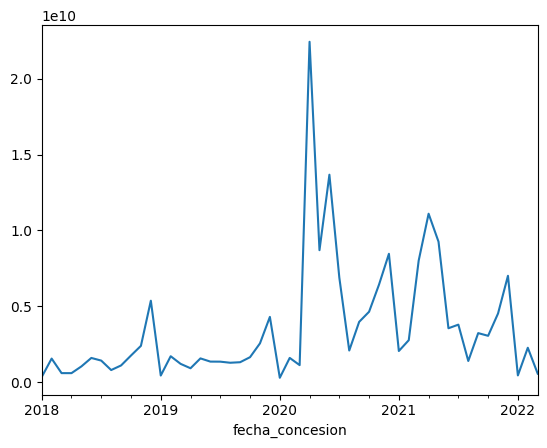

In [42]:
(
    df.set_index("fecha_concesion")
    .resample("M")["importe"].sum()
    .plot()
)

In [48]:
import matplotlib.pyplot as plt

In [47]:
dfs = {}
for nombre_instrumento in df["instrumento"].unique():
    dfs[nombre_instrumento] = (
        df.loc[df["instrumento"] == nombre_instrumento]
    )

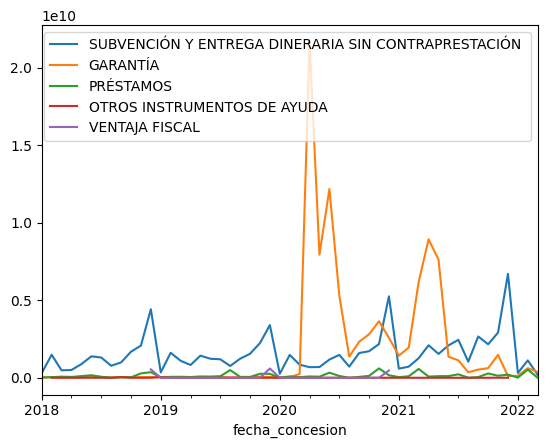

In [51]:
fig, ax = plt.subplots()

for nombre_instrumento, df_instrumento in dfs.items():
    (
        df_instrumento.set_index("fecha_concesion")
        .resample("M")
        ["importe"].sum()
        .plot(ax=ax, label=nombre_instrumento)
    )

ax.legend()

In [52]:
df.groupby("instrumento")["importe"].sum().sort_values()

instrumento
OTROS INSTRUMENTOS DE AYUDA                             1.066160e+08
VENTAJA FISCAL                                          1.604642e+09
PRÉSTAMOS                                               6.886003e+09
SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPRESTACIÓN     7.906257e+10
GARANTÍA                                                9.394452e+10
Name: importe, dtype: float64

In [55]:
top_beneficiarios = (
    df
    .groupby("beneficiario")["importe"].sum()
    .nlargest(10)
)
top_beneficiarios

beneficiario
Q4618001D UNIVERSITAT DE VALENCIA (ESTUDI GENERAL DE VALENCIA)                               1.481605e+09
Q4618002B UNIVERSIDAD POLITECNICA DE VALENCIA-MINISTERIO DE UNIVERSIDADES E INVESTIGACION    1.234546e+09
S2827001E Mº SANIDAD CONSUMO Y BIENESTAR SOCIAL                                              8.667116e+08
Q2866001G CRUZ ROJA ESPAÑOLA                                                                 7.908705e+08
A28017895 EL CORTE INGLES, S.A.                                                              7.180400e+08
Q3018001B UNIVERSIDAD DE MURCIA                                                              7.100083e+08
A63422141 VUELING AIRLINES S.A.                                                              6.536450e+08
A38666897 BINTER CANARIAS S.A.                                                               6.377104e+08
A85850394 IBERIA LINEAS AEREAS DE ESPAÑA SA OPERADORA                                        6.156000e+08
Q2818002D AGENCIA ESTATAL CONSEJO

In [56]:
dfs = {}
for nombre_beneficiario in top_beneficiarios.index:
    dfs[nombre_beneficiario] = (
        df.loc[df["beneficiario"] == nombre_beneficiario]
    )

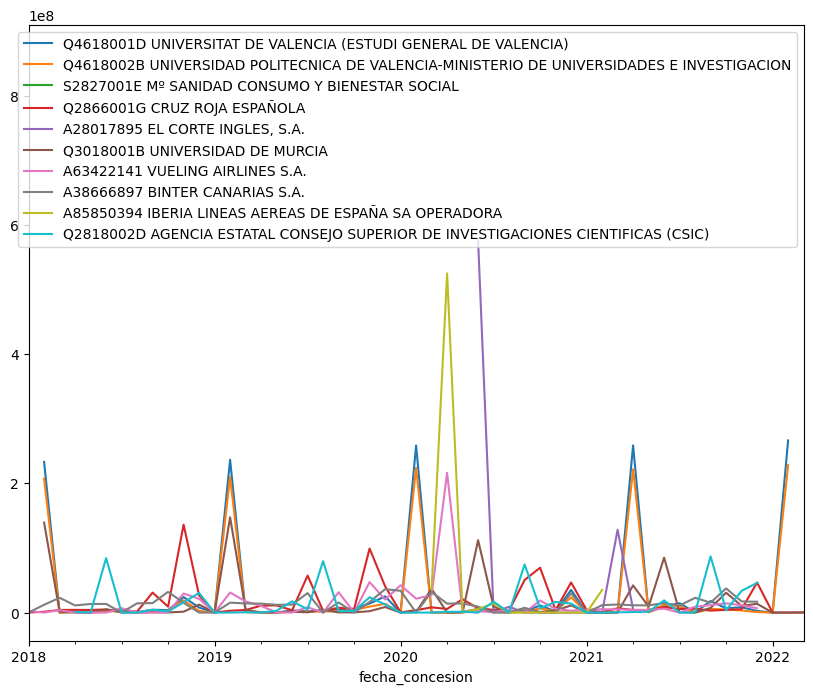

In [57]:
fig, ax = plt.subplots(figsize=(10, 8))

for nombre_beneficiario, df_beneficiario in dfs.items():
    (
        df_beneficiario.set_index("fecha_concesion")
        .resample("M")
        ["importe"].sum()
        .plot(ax=ax, label=nombre_beneficiario)
    )

ax.legend()

In [59]:
df.groupby("titulo_convocatoria")["importe"].sum().nlargest(10)

titulo_convocatoria
Avales a financiación a empresas y autónomos del Ministerio de Asuntos Económicos y Transformación Digital para paliar efectos del COVID19. Artículo 29 RDL 8/2020 - gestionados por el ICO                                                      5.357864e+10
Avales a financiación a empresas y autónomos concedidos por el Ministerio de Asuntos Económicos y Transformación Digital para paliar efectos del COVID19, gestionados por el ICO por cuenta del Ministerio. Artículo 29 RDL 8/2020.              2.648271e+10
Avales a financiación a empresas y autónomos concedidos por el Ministerio de Asuntos Económicos y Transformación Digital para paliar efectos del COVID19, gestionados por el ICO por cuenta del Ministerio. Artículo 1 RDL 25/2020.              5.704274e+09
Avales a financiación a empresas y autónomos concedidos por el Ministerio de Asuntos Económicos y Transformación Digital para paliar efectos del COVID19, gestionados por el ICO por cuenta del Ministerio. Artículo 1 RDL

In [58]:
df.head(3)

,id_convocatoria,administracion,departamento,organo,titulo_convocatoria,url_bases_regul,apli_presupuestaria,fecha_concesion,beneficiario,importe,instrumento,ayuda_equivalente,detalles,codigo_bdns,valor_desconocido,id_interna
id,,,,,,,,,,,,,,,,
65045185,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4407400C AYUNTAMIENTO DE CEDRILLAS,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,1
65045222,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4427500F AYUNTAMIENTO DE VILLARQUEMADO,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,2
65045266,811910,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,2022-03-3321-46203,2022-03-24,P4422100J AYUNTAMIENTO DE SANTA EULALIA DEL CAMPO,500.0,SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPREST...,500.0,0,610350,10413793,3


In [70]:
convocatorias = pd.read_csv("files/convocatorias-final.csv")

/var/folders/r7/ywj0_kvj0mxfkdkx0jrgh73r0000gn/T/ipykernel_13103/3944525424.py:1: DtypeWarning: Columns (1,9) have mixed types. Specify dtype option on import or set low_memory=False.
  convocatorias = pd.read_csv("files/convocatorias-final.csv")


In [72]:
convocatorias.loc[convocatorias["id"] == 811910]

,id,codigo_bdns,MRR,administracion,departamento,organo,fecha_registro,titulo_convocatoria,url_bases_regul,titulo_cooficial,colDesconocida1,colDesconocida2,colDesconocida3
6514,811910,610350,NO,COMARCA COMUNIDAD DE TERUEL,COMARCA DE COMUNIDAD DE TERUEL,NaN,14/02/2022,CONVOCATORIA DE SUBVENCIONES DESTINADAS A AYUN...,https://236ws.dpteruel.es/estatico/boletines/2...,NaN,NaN,350078,6515


In [60]:
archipielagos = (
    df.loc[
        df["titulo_convocatoria"] == "Subvenciones al transporte aéreo para residentes en Canarias, Baleares, Ceuta y Melilla"
    ]
)

In [64]:
archipielagos.groupby("beneficiario")["importe"].sum().nlargest(10)

beneficiario
A38666897 BINTER CANARIAS S.A.                                            6.362447e+08
A85850394 IBERIA LAE SA OPERADORA UNIPERSONAL                             4.902709e+08
A63422141 VUELING AIRLINES S.A.                                           4.395561e+08
A07129430 AIR EUROPA LINEAS AEREAS S.A.U                                  3.576948e+08
B76013481 CANARYFLY S.L                                                   5.893983e+07
A86312691 COMPAÑÍA OPERADORA DE CORTO Y MEDIO RADIO IBERIA EXPRESS S.A    5.554097e+07
B72291503 GLOBAL AERONAUTICS SOLUTIONS CORP., S.L.                        1.246501e+07
B64841927 VOLOTEA S.L.                                                    3.242329e+06
A78348612 SWIFTAIR SA                                                     1.646222e+04
A57797755 EVELOP AIRLINES, S.L.                                           1.412651e+04
Name: importe, dtype: float64

In [65]:
archipielagos.groupby("organo")["importe"].sum().nlargest(10)

organo
DIRECCIÓN GENERAL DE AVIACIÓN CIVIL    2.053986e+09
Name: importe, dtype: float64

In [66]:
archipielagos.groupby("instrumento")["importe"].sum().nlargest(10)

instrumento
SUBVENCIÓN Y ENTREGA DINERARIA SIN CONTRAPRESTACIÓN     2.053986e+09
Name: importe, dtype: float64

In [67]:
archipielagos.groupby("administracion")["importe"].sum().nlargest(10)

administracion
ESTADO    2.053986e+09
Name: importe, dtype: float64

<Axes: xlabel='fecha_concesion'>

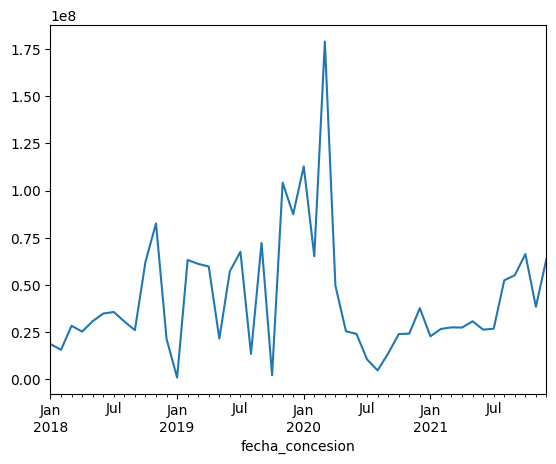

In [63]:
(
    archipielagos
    .set_index("fecha_concesion")
    .resample("M")["importe"].sum()
    .plot()
)